In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
data = Path("base_5_data.csv")

In [4]:
og_data = pd.read_csv(data)
og_data.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
0,723,alfa-romeo,Alfa Romeo Stelvio,blue,08/2019,2019,41990,510,Automatic,Petrol,9.2,199000.0
1,724,alfa-romeo,Alfa Romeo Giulietta,blue,10/2019,2019,16995,120,Manual,Petrol,7.4,49700.0
2,725,alfa-romeo,Alfa Romeo Giulia,blue,02/2019,2019,30880,209,Automatic,Diesel,5.5,129357.0
3,726,alfa-romeo,Alfa Romeo Stelvio,blue,10/2019,2019,30890,190,Automatic,Diesel,6.1,82239.0
4,727,alfa-romeo,Alfa Romeo Stelvio,blue,05/2019,2019,68900,510,Unknown,Petrol,9.8,7000.0


In [5]:
# Columns we're interested in:
og_data = og_data[['brand','model','color','registration_date','year','price_in_euro','power_ps',
                   'transmission_type','fuel_type','fuel_consumption_l_100km','mileage_in_km']]
og_data.head()

,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
0,alfa-romeo,Alfa Romeo Stelvio,blue,08/2019,2019,41990,510,Automatic,Petrol,9.2,199000.0
1,alfa-romeo,Alfa Romeo Giulietta,blue,10/2019,2019,16995,120,Manual,Petrol,7.4,49700.0
2,alfa-romeo,Alfa Romeo Giulia,blue,02/2019,2019,30880,209,Automatic,Diesel,5.5,129357.0
3,alfa-romeo,Alfa Romeo Stelvio,blue,10/2019,2019,30890,190,Automatic,Diesel,6.1,82239.0
4,alfa-romeo,Alfa Romeo Stelvio,blue,05/2019,2019,68900,510,Unknown,Petrol,9.8,7000.0


In [6]:
og_data.dtypes

brand                        object
model                        object
color                        object
registration_date            object
year                          int64
price_in_euro                 int64
power_ps                      int64
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km    float64
mileage_in_km               float64
dtype: object

In [8]:
# Dropping aal the na values 
og_data1 = og_data.dropna()
og_data1.count()

brand                       88616
model                       88616
color                       88616
registration_date           88616
year                        88616
price_in_euro               88616
power_ps                    88616
transmission_type           88616
fuel_type                   88616
fuel_consumption_l_100km    88616
mileage_in_km               88616
dtype: int64

In [66]:
og_data1.head()

,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
0,alfa-romeo,Alfa Romeo Stelvio,blue,08/2019,2019,41990,510,Automatic,Petrol,9.2,199000.0
1,alfa-romeo,Alfa Romeo Giulietta,blue,10/2019,2019,16995,120,Manual,Petrol,7.4,49700.0
2,alfa-romeo,Alfa Romeo Giulia,blue,02/2019,2019,30880,209,Automatic,Diesel,5.5,129357.0
3,alfa-romeo,Alfa Romeo Stelvio,blue,10/2019,2019,30890,190,Automatic,Diesel,6.1,82239.0
5,alfa-romeo,Alfa Romeo Stelvio,blue,03/2019,2019,30700,280,Automatic,Petrol,8.0,76500.0


In [11]:
# Dropping numeric values from the fuel_type 
og_data1 = og_data1[~og_data1['fuel_type'].str.contains(r'\d')]

In [12]:
# Dropping other unwanted values from the fuel_type 
values_to_drop = ['Automatic', 'Manual', 'Other', 'Unknown']

og_data1 = og_data1[~og_data1['fuel_type'].isin(values_to_drop)]

In [13]:
# Dropping rows with unknown values from the transmission_type 
values_to_drop1 = ['Unknown']

og_data1 = og_data1[~og_data1['transmission_type'].isin(values_to_drop1)]

In [14]:
# Dropping rows with un-realistic fuel consumption figures from the column fuel_consumption_l_100km

og_data1 = og_data1[og_data1['fuel_consumption_l_100km'] <= 30]

In [39]:
# Saving new clean csv 
og_data1.to_csv('daryl_5y.csv', index=False)

In [15]:
og_data1.count()

brand                       88260
model                       88260
color                       88260
registration_date           88260
year                        88260
price_in_euro               88260
power_ps                    88260
transmission_type           88260
fuel_type                   88260
fuel_consumption_l_100km    88260
mileage_in_km               88260
dtype: int64

In [22]:
sale_count = og_data1.brand.value_counts()
print(sale_count)

volkswagen       7731
skoda            7044
seat             6924
opel             6773
ford             6557
audi             5421
toyota           5068
mercedes-benz    5016
bmw              3524
renault          3165
kia              2938
hyundai          2810
peugeot          2698
fiat             2582
mazda            2315
volvo            2113
mini             1986
citroen          1911
nissan           1831
land-rover       1817
dacia            1672
jeep             1116
porsche           936
jaguar            900
alfa-romeo        652
mitsubishi        541
honda             321
maserati          299
bentley           223
dodge             223
smart             210
ssangyong         194
lamborghini       168
ferrari           138
isuzu             124
aston-martin      108
lada               79
cadillac           62
chevrolet          44
chrysler           17
infiniti            8
rover               1
Name: brand, dtype: int64


In [16]:
print(og_data1['year'].unique())

[2019 2020 2021 2022 2023]


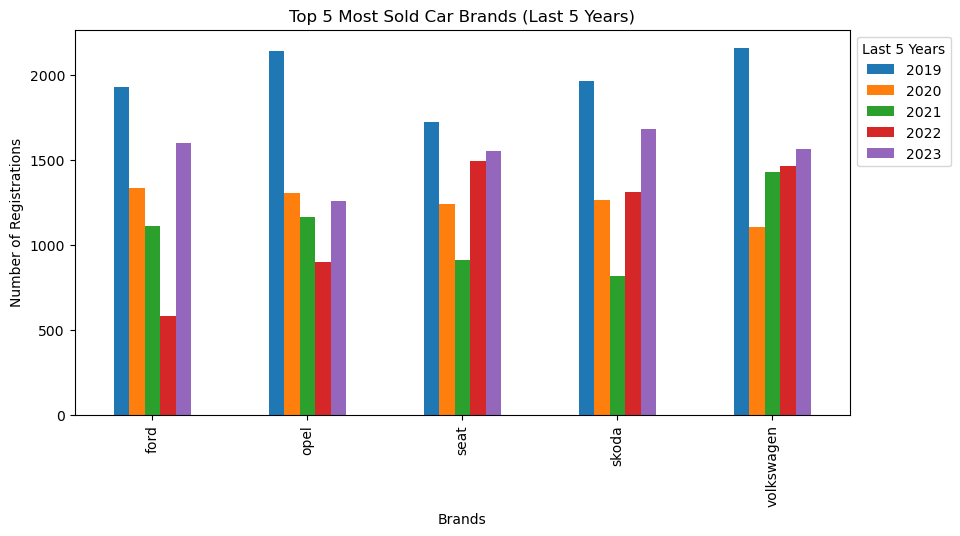

In [68]:
# Show - Which are the most favorite Brand - Bar chart
# Calculate the number of registrations for each car model in the last 5 years
top_brands = og_data1['brand'].value_counts().head(5).index.tolist()

# Filter the data for the top 5 models
top_brands_data = og_data1[og_data1['brand'].isin(top_brands)]

# Group the data by model and year and count the number of registrations for each combination
brands_year_counts = top_brands_data.groupby(['brand', 'year']).size().unstack(fill_value=0)

# Plot the stacked bar chart
brands_year_counts.plot(kind='bar', stacked=False, figsize=(10, 5))
plt.title("Top 5 Most Sold Car Brands (Last 5 Years)")
plt.xlabel("Brands")
plt.ylabel("Number of Registrations")
plt.legend(title='Last 5 Years', bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('output/top 5 most sold brands.png')
plt.show()


In [23]:
# Show the numbers of Top 5 Brands - Last 5 years 
brand_year_counts = top_brands_data.groupby(['brand', 'year']).size().unstack(fill_value=0)

# Display the DataFrame with the top 5 brands and their registration counts by year
print(brand_year_counts)

year        2019  2020  2021  2022  2023
brand                                   
ford        1931  1338  1110   580  1598
opel        2144  1308  1165   898  1258
seat        1723  1241   909  1495  1556
skoda       1964  1263   820  1313  1684
volkswagen  2160  1108  1430  1467  1566


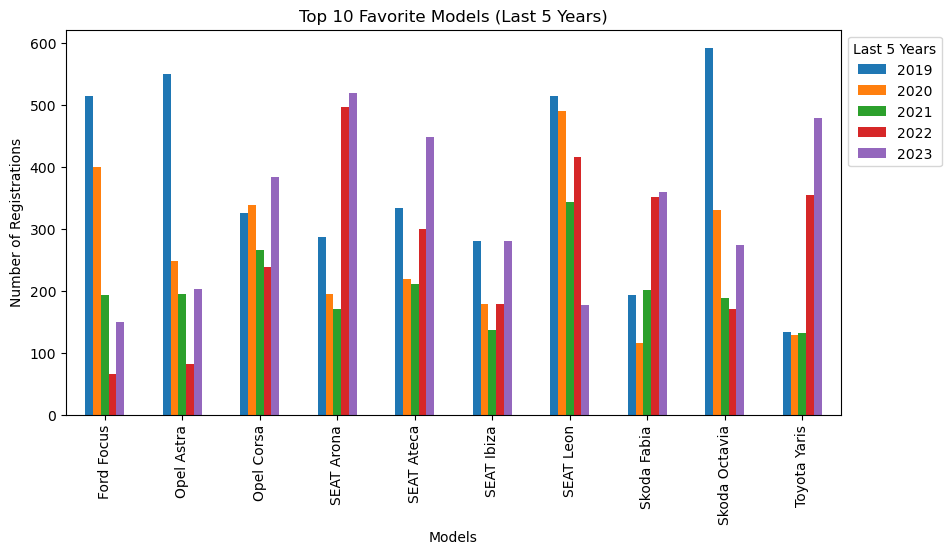

In [69]:
# Top 10 favorite Models - Bar chart

# Calculate the number of registrations for each car model in the last 5 years
top_models = og_data1['model'].value_counts().head(10).index.tolist()

# Filter the data for the top 5 models
top_models_data = og_data1[og_data1['model'].isin(top_models)]

# Group the data by model and year and count the number of registrations for each combination
model_year_counts = top_models_data.groupby(['model', 'year']).size().unstack(fill_value=0)

# Plot the stacked bar chart
model_year_counts.plot(kind='bar', figsize=(10, 5))
plt.title("Top 10 Favorite Models (Last 5 Years)")
plt.xlabel("Models")
plt.ylabel("Number of Registrations")
plt.legend(title='Last 5 Years', bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('output/Top 10 Favorite Models.png')
plt.show()


In [48]:
model_year_counts = top_models_data.groupby(['model', 'year']).size().unstack(fill_value=0)
print(model_year_counts)

year           2019  2020  2021  2022  2023
model                                      
Ford Focus      514   399   193    65   149
Opel Astra      550   248   195    82   203
Opel Corsa      325   338   265   239   383
SEAT Arona      286   194   170   496   520
SEAT Ateca      333   219   211   300   448
SEAT Ibiza      280   179   136   178   281
SEAT Leon       515   490   343   416   177
Skoda Fabia     193   116   201   351   359
Skoda Octavia   592   330   188   170   274
Toyota Yaris    133   128   131   355   479


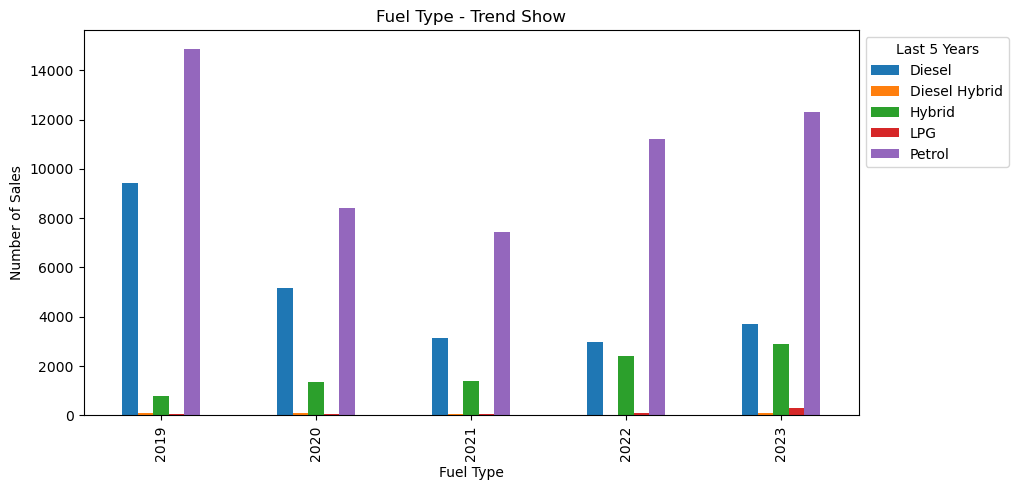

In [71]:
# Favorite Fuel Type - Bar chart

# Calculate the number of registrations for each car model in the last 5 years
top_fuel = og_data1['fuel_type'].value_counts().head(5).index.tolist()

# Filter the data for the top 5 models
top_fuel_data = og_data1[og_data1['fuel_type'].isin(top_fuel)]

# Group the data by model and year and count the number of registrations for each combination
top_fuel_counts = top_fuel_data.groupby(['year', 'fuel_type']).size().unstack(fill_value=0)

# Plot the stacked bar chart
top_fuel_counts.plot(kind='bar', figsize=(10, 5))
plt.title("Fuel Type - Trend Show")
plt.xlabel("Fuel Type")
plt.ylabel("Number of Sales")
plt.legend(title='Last 5 Years', bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('output/Fuel Demand last 5 years.png')
plt.show()

In [40]:
top_fuel_counts = top_fuel_data.groupby(['year', 'fuel_type']).size().unstack(fill_value=0)
top_fuel_counts

fuel_type,Diesel,Diesel Hybrid,Hybrid,LPG,Petrol
year,,,,,
2019,9425,79,788,62,14880
2020,5143,80,1351,37,8425
2021,3121,54,1375,48,7433
2022,2958,22,2391,107,11198
2023,3707,78,2888,286,12313


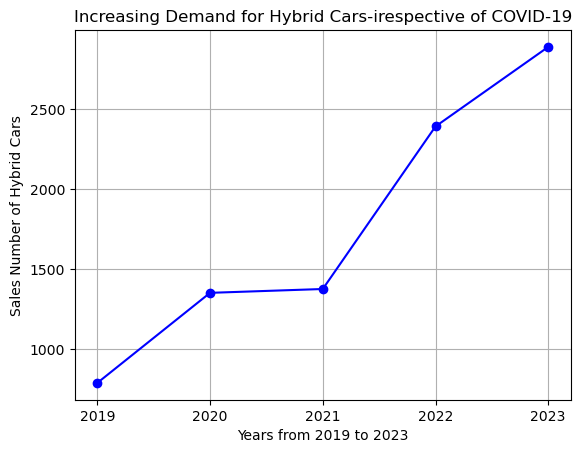

In [50]:
# Step 1: Filter the data for the last 5 years
og_data_5y = og_data1.loc[(og_data1['year'] >= 2019) & (og_data1['year'] <= 2023)]

# Step 2: Group the data by year and fuel_type and count the occurrences of 'Hybrid'
hybrid_counts = og_data_5y[og_data_5y['fuel_type'] == 'Hybrid'].groupby('year').size()

# Step 3: Plot the line graph
plt.plot(hybrid_counts.index, hybrid_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Years from 2019 to 2023')
plt.ylabel('Sales Number of Hybrid Cars')
plt.title('Increasing Demand for Hybrid Cars-irespective of COVID-19')
plt.grid(True)
plt.xticks(hybrid_counts.index)
plt.savefig('output/hybrid_cars_over_last_5_years.png')
# Step 4: Show the plot
plt.show()

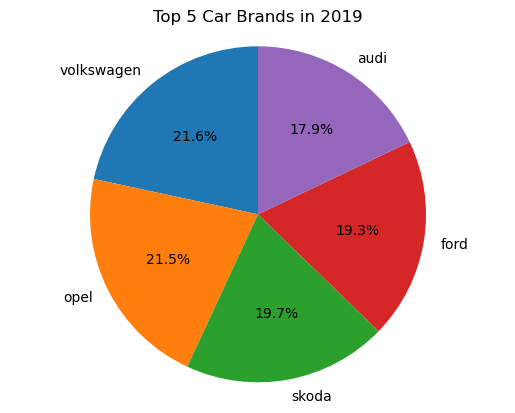

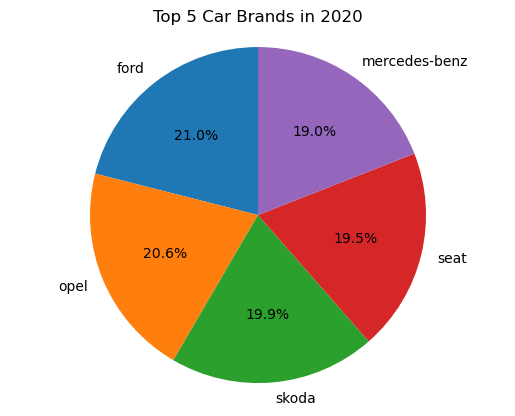

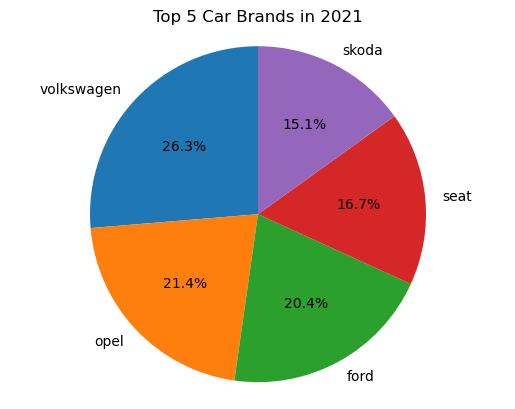

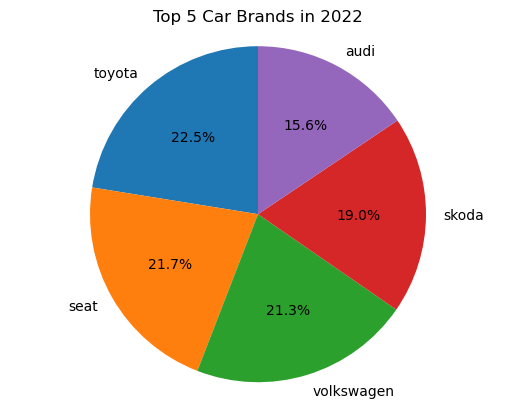

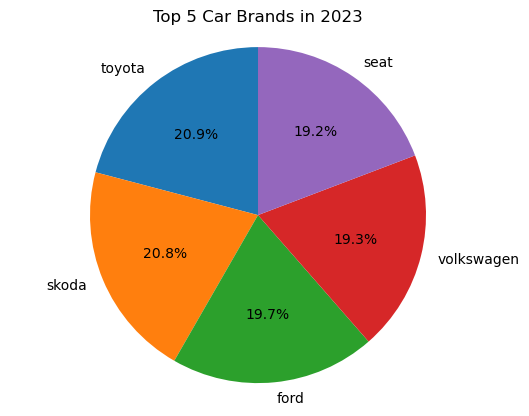

In [58]:
# Showing the Market Share of Top 5 Brands - using Pie Chart

# Group the data by 'year' and 'brand' in each year
brand_registrations = og_data1.groupby(['year', 'brand']).size().reset_index(name='registrations')

# Sort the data in descending order to find the top 5 Brands for last 5 years
top_5_brands_by_year = brand_registrations.sort_values(by=['year', 'registrations'], ascending=[True, False]).groupby('year').head(5)

# Plot a pie chart for each year with the top 3 brands
years = top_5_brands_by_year['year'].unique()
for year in years:
    data_for_year = top_5_brands_by_year[top_5_brands_by_year['year'] == year]
    plt.figure()
    plt.pie(data_for_year['registrations'], labels=data_for_year['brand'], autopct='%1.1f%%', startangle=90)
    plt.title(f"Top 5 Car Brands in {year}")
    plt.axis('equal')
    plt.savefig(f'output/Market-Share-Top 5 Favorite Brands{year}.png')
    plt.show()


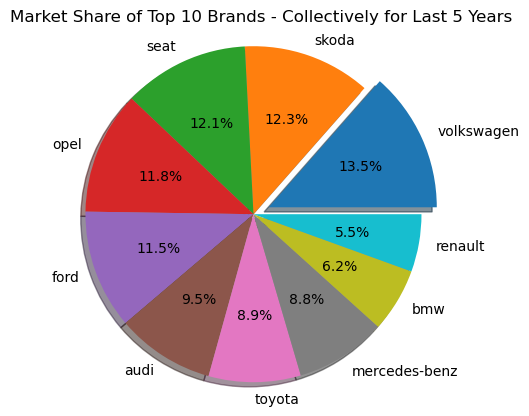

In [61]:
# Showing the Market Share of Top 10 Brands Collectively Last 5 years - using Pie Chart

market_share = og_data1['brand'].value_counts().head(10)
#Explode parameters
numero_uno = market_share.idxmax()

explode = [0.1 if brand == numero_uno else 0 for brand in market_share.index]

# Plot a pie chart showing the market share of each brand
plt.figure()
plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', startangle=0, explode=explode, shadow=True)
plt.title("Market Share of Top 10 Brands - Collectively for Last 5 Years")
plt.axis('equal')
plt.savefig('output/Market-Share-Top 10 Brands-Last 5years Collectively.png')
plt.show()

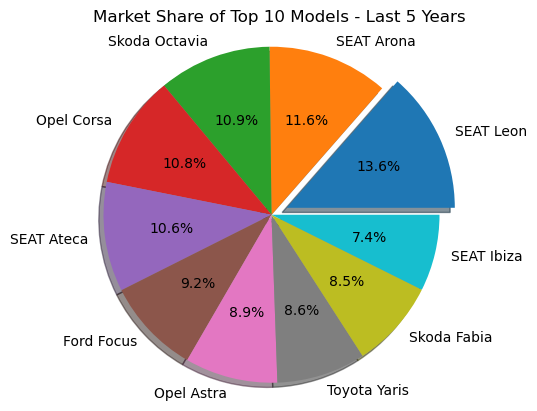

In [62]:
# Showing the Market Share of Top 10 Models -Last 5 years - using Pie Chart

model_market_share = og_data1['model'].value_counts().head(10)
#Explode parameters
model_numero_uno = model_market_share.idxmax()

explode = [0.1 if model == model_numero_uno else 0 for model in model_market_share.index]

# Plot a pie chart showing the market share of each brand
plt.figure()
plt.pie(model_market_share, labels=model_market_share.index, autopct='%1.1f%%', startangle=0, explode=explode, shadow=True)
plt.title("Market Share of Top 10 Models - Last 5 Years")
plt.axis('equal')
plt.savefig('output/Market-Share-Top 10 Models-Last 5years Collectively.png')
plt.show()

In [27]:
sales_by_fuel_consumption = og_data1.groupby('fuel_consumption_l_100km')['registration_date'].count().reset_index()
sales_by_fuel_consumption = sales_by_fuel_consumption.rename(columns={'registration_date': 'number_of_sales'})

print(sales_by_fuel_consumption)

     fuel_consumption_l_100km  number_of_sales
0                         0.0               25
1                         0.1                6
2                         0.2                3
3                         0.4                2
4                         0.5                4
..                        ...              ...
177                      21.0                4
178                      21.2                1
179                      21.9                1
180                      22.0                1
181                      22.6                1

[182 rows x 2 columns]


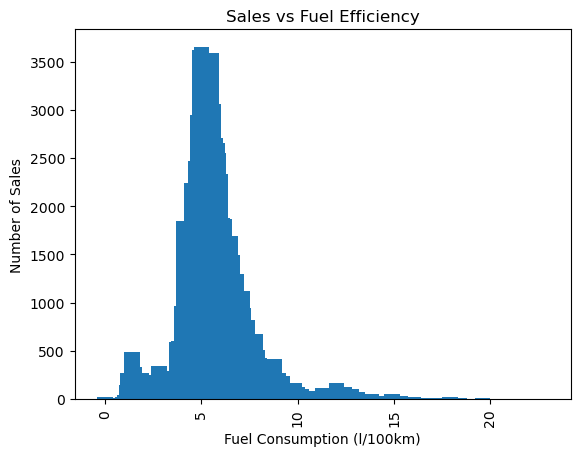

In [65]:
# Group data by 'fuel_consumption_l_100km' and calculate the average number of sales
sales_by_fuel_consumption = og_data1.groupby('fuel_consumption_l_100km')['registration_date'].count().reset_index()
sales_by_fuel_consumption = sales_by_fuel_consumption.rename(columns={'registration_date': 'number_of_sales'})

# Plot the bar chart
plt.bar(sales_by_fuel_consumption['fuel_consumption_l_100km'], sales_by_fuel_consumption['number_of_sales'])
plt.xlabel('Fuel Consumption (l/100km)')
plt.ylabel('Number of Sales')
plt.title('Sales vs Fuel Efficiency')
plt.xticks(rotation=90)
plt.savefig('output/Sales vs Fuel Efficiency.png')
plt.show()

In [72]:
sales_by_fuel_consumption = og_data1.groupby('fuel_consumption_l_100km')['registration_date'].count().reset_index()
sales_by_fuel_consumption = sales_by_fuel_consumption.rename(columns={'registration_date': 'number_of_sales'})
sales_by_fuel_consumption

,fuel_consumption_l_100km,number_of_sales
0,0.0,25
1,0.1,6
2,0.2,3
3,0.4,2
4,0.5,4
...,...,...
177,21.0,4
178,21.2,1
179,21.9,1
180,22.0,1
